## Decision Tree & Random Forest 
We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

### 1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

### 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

### 3. Change the decision tree parameters(change at least two parameters), 

### 4. Calculate the new accuracy and compare it with the previous results. 

### 5. Use random forest then change the number of estimators

### 6. Calculate the new accuracy and compare it with the previous result


## 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
url='https://drive.google.com/file/d/1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc/'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_titanic= pd.read_csv(dwn_url,sep=";")
title_Dictionary = {

                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"}
for i in df_titanic.index:
    for j in title_Dictionary.keys():
        if j in df_titanic.Name[i]:
            df_titanic.loc[i,'Title']=title_Dictionary[j]
df_titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns', inplace=True)
df_titanic["FamilySize"]=df_titanic['SibSp'] + df_titanic['Parch'] + 1
df_titanic['Survived'] = df_titanic['Survived'].map({'Yes':1, 'No':0})
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(2)
df_titanic['Age'].fillna(value=df_titanic['Age'].mean(), inplace=True)
df_titanic['Sex'] = df_titanic['Sex'].map({'male':1, 'female':0})
df_titanic['Embarked'] = df_titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
df_titanic['Title'] = df_titanic['Title'].map(title_mapping)
df_titanic['Title'] = df_titanic['Title'].fillna(0)

In [2]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,1,28.000000,0,0,13.0000,0.0,3.0,1
1,0,3,1,25.000000,0,0,7.6500,0.0,3.0,1
2,0,3,1,20.000000,0,0,7.8542,0.0,3.0,1
3,0,3,0,29.000000,0,4,21.0750,0.0,3.0,5
4,0,1,1,31.000000,1,0,52.0000,0.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,1.0,3.0,2
887,0,3,1,22.000000,0,0,7.2292,1.0,3.0,1
888,0,3,0,30.000000,0,0,8.6625,0.0,4.0,1
889,0,3,1,29.699118,0,0,7.8958,0.0,3.0,1


In [3]:
y=df_titanic['Survived']
x=df_titanic[['Sex','Pclass']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [4]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   
y_pred=tree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


## 2 

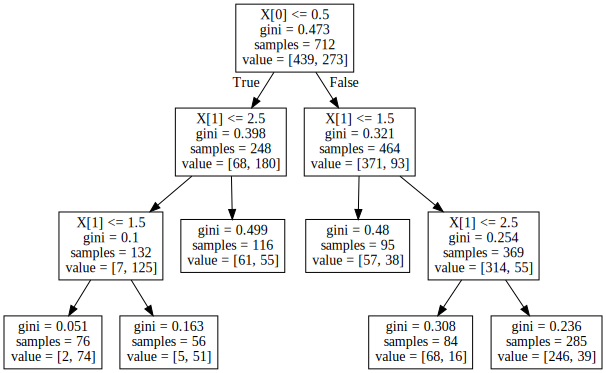

In [5]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
#### prediction manually
y=[]
for i in x_test.index:
    if x_test.loc[i,'Sex']==0:
        if x_test.loc[i,'Pclass']<=2.5:
            y=y+[0]
        else:
            y=y+[1]
    else:
        if x_test.loc[i,'Pclass']<=1.5:
            y=y+[0]
        else:
            y=y+[1]
        
A=np.array(y)
A

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0])

## 3

In [18]:
y_1=df_titanic['Survived']
x_1=df_titanic[['Age','Sex','Pclass','SibSp','FamilySize']]
x_1train,x_1test,y_1train,y_1test = train_test_split(x_1,y_1,test_size=0.2,random_state=20)
tree.fit(x_1train, y_1train)   
y_1pred=tree.predict(x_1test)   
print("score:{}".format(accuracy_score(y_1test, y_1pred)))

score:0.8324022346368715


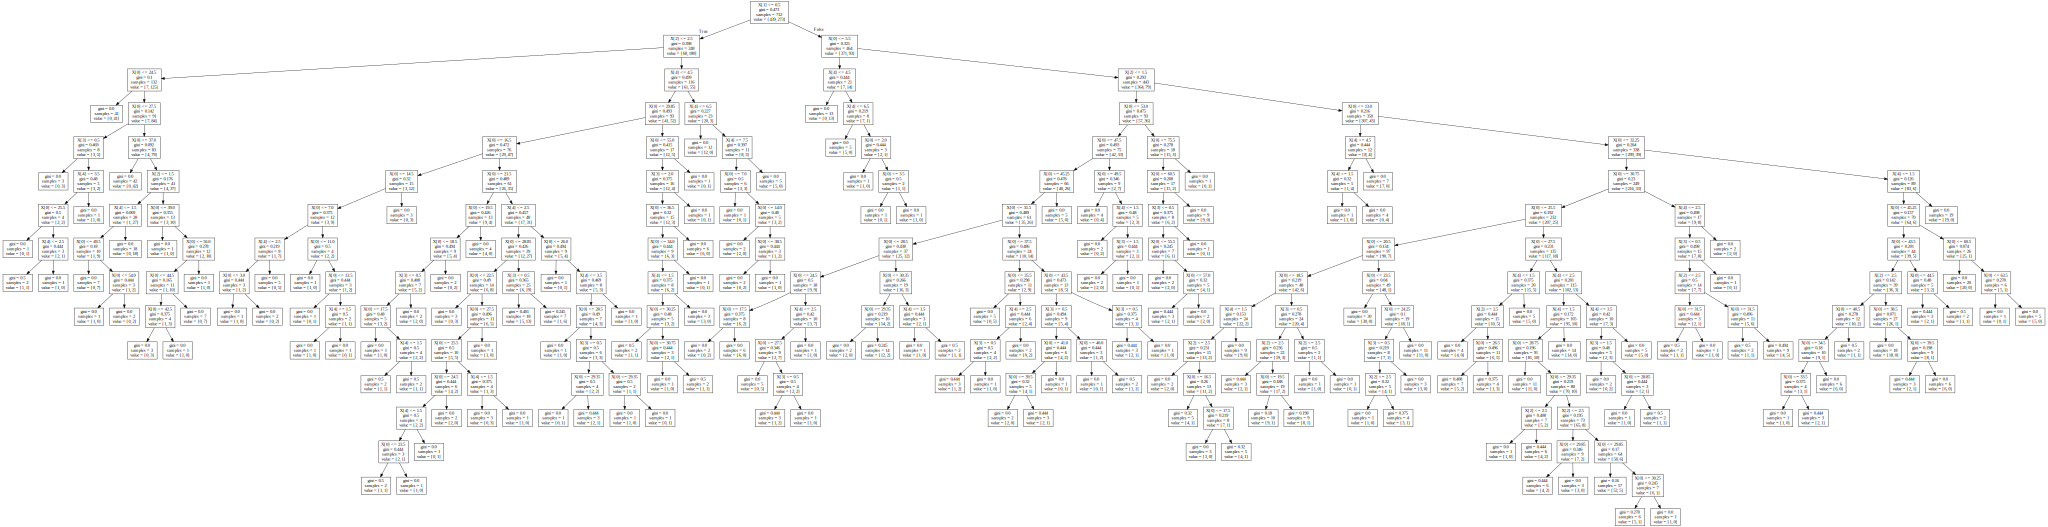

In [9]:
export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 4 , 5

In [10]:
from sklearn.ensemble import RandomForestClassifier 

In [22]:
Y=df_titanic['Survived']
X=df_titanic[['Age','Sex','Pclass','SibSp','FamilySize']]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)
clf=RandomForestClassifier(n_estimators=30)
clf.fit(X_train, Y_train)  
Y_pred=clf.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_1test, y_1pred))

Accuracy: 0.8324022346368715
